In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar

In [2]:
df = pd.read_csv('/Users/miguelvidal/Downloads/Premier League Defensive Actions.csv')

In [3]:
df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Tkl,TklW,...,Press Succ%,Blocks,Block Sh,Sh on Tgt Blk,Pass Block,Int,Tkl+Int,Clr,Err,Matches
0,1,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,29.0,1990.0,19.7,33,19,...,33.5,31,7,1,24,34,67,40,1,Matches
1,2,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,22.0,1997.0,11.6,8,4,...,23.5,9,2,0,7,2,10,17,0,Matches
2,3,Che Adams\Che-Adams,sco SCO,FW,Southampton,24.0,1996.0,29.6,30,17,...,32.1,26,4,0,22,11,41,16,1,Matches
3,4,Tosin Adarabioyo\Tosin-Adarabioyo,eng ENG,DF,Fulham,22.0,1997.0,32.8,41,26,...,32.4,38,23,0,15,55,96,241,1,Matches
4,5,Adrián\Adrian,es ESP,GK,Liverpool,33.0,1987.0,3.0,0,0,...,0.0,0,0,0,0,0,0,0,1,Matches


In [4]:
df['Player'] = df['Player'].str.split('\\', expand = True)[0]

In [5]:
df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Tkl,TklW,...,Press Succ%,Blocks,Block Sh,Sh on Tgt Blk,Pass Block,Int,Tkl+Int,Clr,Err,Matches
0,1,Patrick van Aanholt,nl NED,DF,Crystal Palace,29.0,1990.0,19.7,33,19,...,33.5,31,7,1,24,34,67,40,1,Matches
1,2,Tammy Abraham,eng ENG,FW,Chelsea,22.0,1997.0,11.6,8,4,...,23.5,9,2,0,7,2,10,17,0,Matches
2,3,Che Adams,sco SCO,FW,Southampton,24.0,1996.0,29.6,30,17,...,32.1,26,4,0,22,11,41,16,1,Matches
3,4,Tosin Adarabioyo,eng ENG,DF,Fulham,22.0,1997.0,32.8,41,26,...,32.4,38,23,0,15,55,96,241,1,Matches
4,5,Adrián,es ESP,GK,Liverpool,33.0,1987.0,3.0,0,0,...,0.0,0,0,0,0,0,0,0,1,Matches


In [6]:
df = df[(df['Player']== 'Harry Maguire') | (df['Player'] == 'Thiago Silva') | (df['Player'] =='Rúben Dias')].reset_index()
df.head()

,index,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Tkl,...,Press Succ%,Blocks,Block Sh,Sh on Tgt Blk,Pass Block,Int,Tkl+Int,Clr,Err,Matches
0,128,129,Rúben Dias,pt POR,DF,Manchester City,23.0,1997.0,31.6,31,...,37.0,45,25,0,20,22,53,118,0,Matches
1,288,289,Harry Maguire,eng ENG,DF,Manchester Utd,27.0,1993.0,33.9,30,...,35.1,45,24,0,21,61,91,176,1,Matches
2,442,443,Thiago Silva,br BRA,DF,Chelsea,35.0,1984.0,21.5,23,...,38.2,26,13,1,13,28,51,114,1,Matches


In [7]:
df = df.drop(['index', 'Rk', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s','Def 3rd', 'Mid 3rd', 'Att 3rd','Attempted vs Dribbles',  'Matches'], axis = 1)
df

,Player,Tkl,TklW,Tkl vs Dribblers,Tkl%,# Dribble Past,Press,Succ Press,Press Succ%,Blocks,Block Sh,Sh on Tgt Blk,Pass Block,Int,Tkl+Int,Clr,Err
0,Rúben Dias,31,21,6,26.1,17,181,67,37.0,45,25,0,20,22,53,118,0
1,Harry Maguire,30,18,14,53.8,12,191,67,35.1,45,24,0,21,61,91,176,1
2,Thiago Silva,23,13,9,50.0,9,102,39,38.2,26,13,1,13,28,51,114,1


In [8]:
params = list(df.columns)
params = params[1:]
params

['Tkl',
 'TklW',
 'Tkl vs Dribblers',
 'Tkl%',
 '# Dribble Past',
 'Press',
 'Succ Press',
 'Press Succ%',
 'Blocks',
 'Block Sh',
 'Sh on Tgt Blk',
 'Pass Block',
 'Int',
 'Tkl+Int',
 'Clr',
 'Err']

In [9]:
ranges = []
a_value = []
b_value = []

for x in params:
    a = min(df[params][x])
    a = a -(a*.25)
    
    b = max(df[params][x])
    b = b + (b*.25)
    
    ranges.append((a,b))

for x in range(len(df['Player'])):
    if df['Player'][x] == 'Harry Maguire':
        a_values = df.iloc[x].values.tolist()
    if df['Player'][x] == 'Thiago Silva':
        b_values = df.iloc[x].values.tolist()

a_values = a_values[1:]
b_values = b_values[1:]

values = [a_values,b_values]

In [10]:
ranges[4:5] = [(15.0, 6.75)]
ranges

[(17.25, 38.75),
 (9.75, 26.25),
 (4.5, 17.5),
 (19.575000000000003, 67.25),
 (15.0, 6.75),
 (76.5, 238.75),
 (29.25, 83.75),
 (26.325000000000003, 47.75),
 (19.5, 56.25),
 (9.75, 31.25),
 (0.0, 1.25),
 (9.75, 26.25),
 (16.5, 76.25),
 (38.25, 113.75),
 (85.5, 220.0),
 (0.0, 1.25)]

In [11]:
title = dict(
    title_name='Harry Maguire',
    title_color = 'red',
    subtitle_name = 'Manchester United',
    subtitle_color = 'red',
    title_name_2='Thiago Silva',
    title_color_2 = 'Blue',
    subtitle_name_2 = 'Chelsea',
    subtitle_color_2 = 'Blue',
    title_fontsize = 18,
    subtitle_fontsize = 15
)

endnote = '@miggy__5\nInspired by @mckayjohns\ndata via FBREF / Statsbomb'

findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.


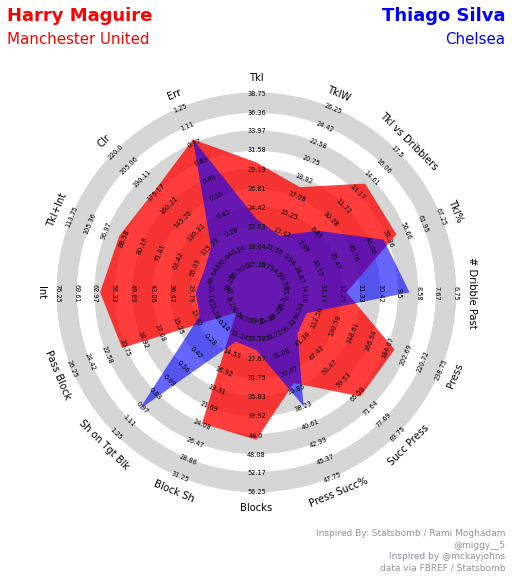

In [12]:
radar = Radar()

fig,ax = radar.plot_radar(ranges = ranges, params = params, values = values,
                         radar_color= ['red', 'blue'],
                         alphas = [.76,.6], title = title, endnote=endnote,
                         compare = True)

In [13]:
ranges = []
a_value = []
b_value = []

for x in params:
    a = min(df[params][x])
    a = a -(a*.25)
    
    b = max(df[params][x])
    b = b + (b*.25)
    
    ranges.append((a,b))

for x in range(len(df['Player'])):
    if df['Player'][x] == 'Harry Maguire':
        a_values = df.iloc[x].values.tolist()
    if df['Player'][x] == 'Rúben Dias':
        b_values = df.iloc[x].values.tolist()

a_values = a_values[1:]
b_values = b_values[1:]

values = [a_values,b_values]

In [15]:
ranges[4:5] = [(21.25 , 6.75)]
ranges

[(17.25, 38.75),
 (9.75, 26.25),
 (4.5, 17.5),
 (19.575000000000003, 67.25),
 (21.25, 6.75),
 (76.5, 238.75),
 (29.25, 83.75),
 (26.325000000000003, 47.75),
 (19.5, 56.25),
 (9.75, 31.25),
 (0.0, 1.25),
 (9.75, 26.25),
 (16.5, 76.25),
 (38.25, 113.75),
 (85.5, 220.0),
 (0.0, 1.25)]

In [20]:
title = dict(
    title_name='Harry Maguire',
    title_color = 'red',
    subtitle_name = 'Manchester United',
    subtitle_color = 'red',
    title_name_2='Rúben Dias',
    title_color_2 = 'deepskyblue',
    subtitle_name_2 = 'Manchester City',
    subtitle_color_2 = 'deepskyblue',
    title_fontsize = 18,
    subtitle_fontsize = 15
)

endnote = '@miggy__5\nInspired by @mckayjohns\ndata via FBREF / Statsbomb'

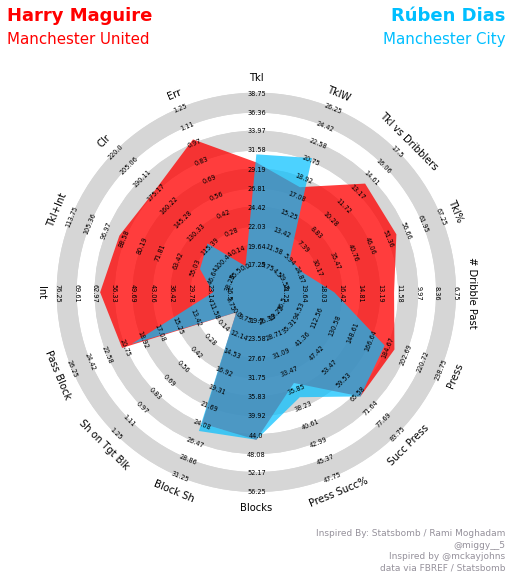

In [21]:
radar = Radar()

fig,ax = radar.plot_radar(ranges = ranges, params = params, values = values,
                         radar_color= ['red', 'deepskyblue'],
                         alphas = [.76,.7], title = title, endnote=endnote,
                         compare = True)